# Assignment: Exploratory Data Analysis
### Jenny Schilling (xdj3kg)
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [2]:
! git clone https://github.com/jennyschilling/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 10), reused 2 (delta 2), pack-reused 48
Receiving objects: 100% (63/63), 8.95 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (17/17), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('visualization/assignment/data/college_completion.csv', low_memory=False)
print(df.shape)
df.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

The data is 3798 rows x 63 columns. This means there are 3798 observations, and 63 variables included. Some of these variables include the college name, city/state, educational level, public/private affiliation, and lots of other data regarding enrollment, transfers, etc.

3. Cross tabulate `control` and `level`. Describe the patterns you see.


In [4]:
pd.crosstab(df['control'],df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


There are significantly more 4-year institutions that are Private not-for-profit than any other category (1180 observations), with 2-year Public university being the second-most common (926 observations). Most of the observations are also 4-year instituions (2339/3798), and most observations are Private institutions (2240/3798).

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

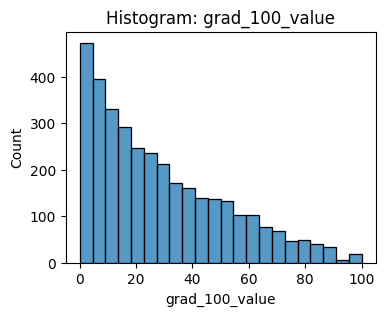

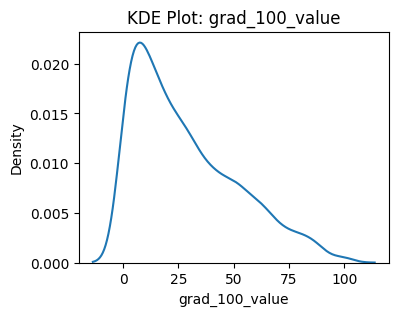

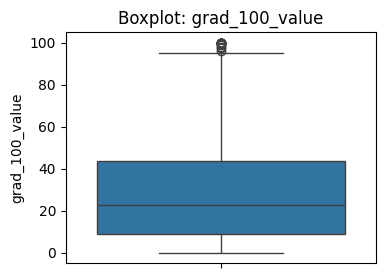

Statistical Description:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [5]:
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.histplot(df['grad_100_value'])
plt.title('Histogram: grad_100_value')
plt.show()

plt.figure(figsize=(4, 3))
sns.kdeplot(df['grad_100_value'])
plt.title('KDE Plot: grad_100_value')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(df['grad_100_value'])
plt.title('Boxplot: grad_100_value')
plt.show()

print('Statistical Description:')
print(df['grad_100_value'].describe())

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?


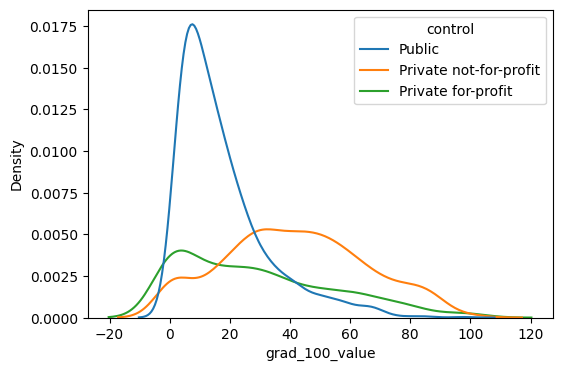

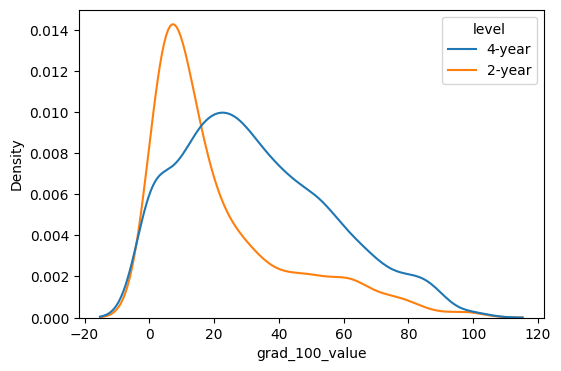

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  
       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   

In [6]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df,x='grad_100_value',hue='control')
plt.show()

plt.figure(figsize=(6, 4))
sns.kdeplot(data=df,x='grad_100_value',hue='level')
plt.show()

print(df.loc[:,['control','grad_100_value']].groupby('control').describe())
print(df.loc[:,['level','grad_100_value']].groupby('level').describe())

print("\n\n4-year institutions and Private not-for-profit institutions appear to have the best graduation rates.")

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?


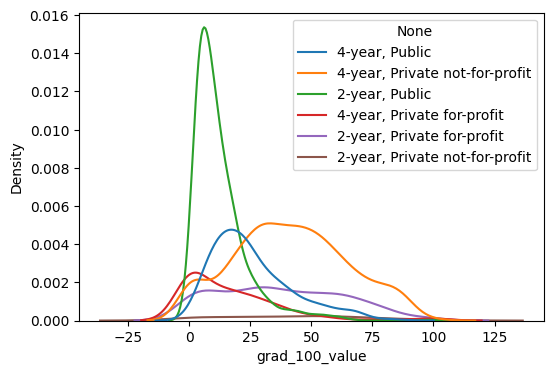

In [7]:
var = df['levelXcontrol']=df['level']+', '+df['control']
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df,x='grad_100_value',hue=var)
plt.show()

print("\nAs expected, 4-year, Private not-for-profit institutions appear to have \nthe best graduation rates, as seen by the orange line that has the greatest \nportion on the right-hand side of the grouped plot.")

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.



As expected, 4-year, Private not-for-profit institutions appear to have 
the best graduation rates, as seen by the orange line that has the greatest 
portion on the right-hand side of the grouped plot.


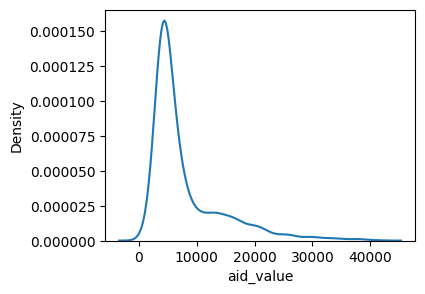

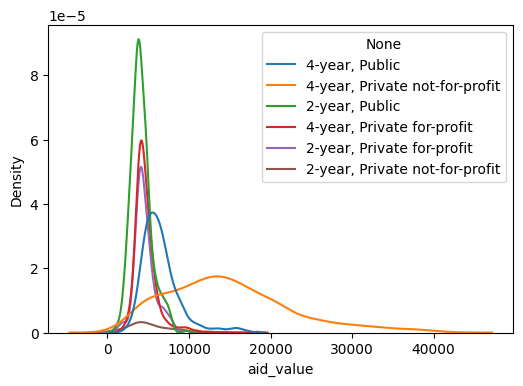

                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                  

In [8]:
plt.figure(figsize=(4, 3))
sns.kdeplot(df['aid_value'])
plt.show()

var = df['levelXcontrol']=df['level']+', '+df['control']
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df,x='aid_value',hue=var)
plt.show()

print(df.loc[:,['control','aid_value']].groupby('control').describe())
print(df.loc[:,['level','aid_value']].groupby('level').describe())

print("\n\nThe shape of the graph is explained by the fact that most students who receive \naid receive between $0 and $10,000. In the grouped kernel density plot, we see a \ngreater percentage of students receiving more aid at 4-year, private not-for-profit \ninstitutions, which likely contributes to the higher graduation rates we see at \nthese schools.")

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

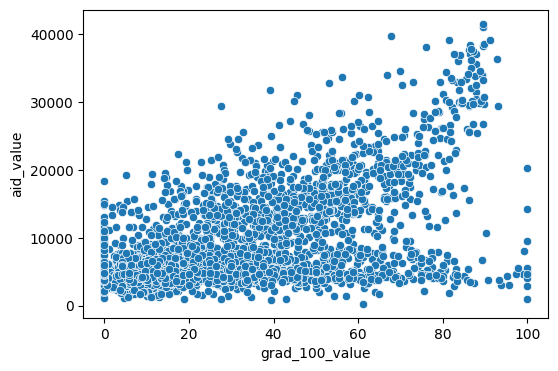

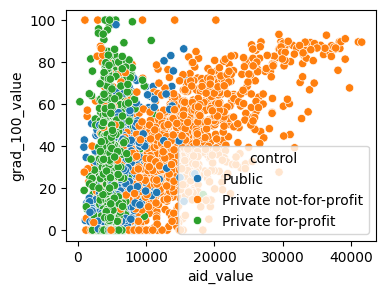

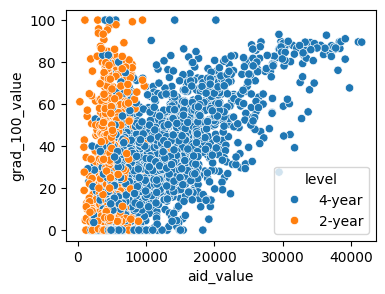


For prive-for-profit and public instituions, more aid does not really 
seem to affect graduation rates, as the points are mostly on the same 
vertical line. However private nfp schools do show a correlation 
between more aid and more graduting students.

Similarly, 2-year institutions do not show a correlation between more 
aid and more graduting students, but 4-year institutions show strong 
evidence that more aid = higher graduation rates.


In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='grad_100_value',y='aid_value')
plt.show()

plt.figure(figsize=(4,3))
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')
plt.show()

plt.figure(figsize=(4,3))
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')
plt.show()

print("\nFor prive-for-profit and public instituions, more aid does not really \nseem to affect graduation rates, as the points are mostly on the same \nvertical line. However private nfp schools do show a correlation \nbetween more aid and more graduting students.")
print("\nSimilarly, 2-year institutions do not show a correlation between more \naid and more graduting students, but 4-year institutions show strong \nevidence that more aid = higher graduation rates.")

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

I chose "[Hospice Enrollments: Information on hospices currently enrolled in Medicare](https://data.cms.gov/provider-characteristics/hospitals-and-other-facilities/hospice-enrollments)."

**Note post-completion of this assignment: this was likely not the best dataset to have chosen for this assignment due to its lack of numerical variables, so some of the following questions are not what might be typically expected in terms of visuals for plots/answers. I worked with the dataset to the best of my ability and used what I had to analyze the data thoroughly.

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.


The data dictionary does not document how missing details are handled, despite the data having a large amount of missing items. Categorical variables are described (like state abbreviations and provider type codes), but missing values are still not accounted for. For the most part, the data dictionary provides a good, detailed description of the columns and variables included in the data set, but there is a lack of explanation in terms of the handling of missing or incomplete data.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.


In [10]:
df = pd.read_csv('visualization/data/Hospice_Enrollments_2024.01.05.csv', encoding='iso-8859-1', low_memory=False)
df.head()
#Enrollment State - Do certain regions/states have more hospices enrolled in Medicare?
state = df['ENROLLMENT STATE']
state = state.replace(['GU', 'VI','MP','PR','PW','AS'], 'ISLANDS') # each island only has a couple data points, just combine
df['ENROLLMENT STATE'] = state
del state
print(df['ENROLLMENT STATE'].value_counts())

#Organization Type Structure - How do different organizations prioritize Medicare?
#How does this align with the regions of the hospices?
org = df['ORGANIZATION TYPE STRUCTURE']
org = org.replace(['SOLE PROPRIETOR'], 'OTHER') # only two hospices identify as "sole proprietor- can be moved to 'other' category"
df['ORGANIZATION TYPE STRUCTURE'] = org
del org
print(df['ORGANIZATION TYPE STRUCTURE'].value_counts())

#Proprietary or Nonproft - Do certain states and regions have a preference for propriety or nonprofit IRS association?
#How does the organization type affect this option?
print(df['PROPRIETARY_NONPROFIT'].value_counts())
#no cleaning necessary

CA         2311
TX         1013
AZ          267
GA          248
PA          179
MI          161
OH          156
IL          130
NV          129
MO          126
LA          122
OK          122
VA          116
IN           98
AL           89
WI           89
SC           86
UT           85
MS           84
CO           83
KS           82
NC           77
MA           77
IA           75
MN           71
OR           64
NJ           60
TN           57
NM           54
FL           54
ID           50
ISLANDS      48
AR           46
WA           41
NY           40
NE           40
MT           29
MD           26
KY           23
CT           22
NH           21
WY           19
WV           18
ME           17
SD           16
DE           14
ND           13
VT           10
HI           10
RI            9
AK            5
DC            4
Name: ENROLLMENT STATE, dtype: int64
CORPORATION    4009
LLC            2550
OTHER           241
PARTNERSHIP      86
Name: ORGANIZATION TYPE STRUCTURE, dtype: int64
P  

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?


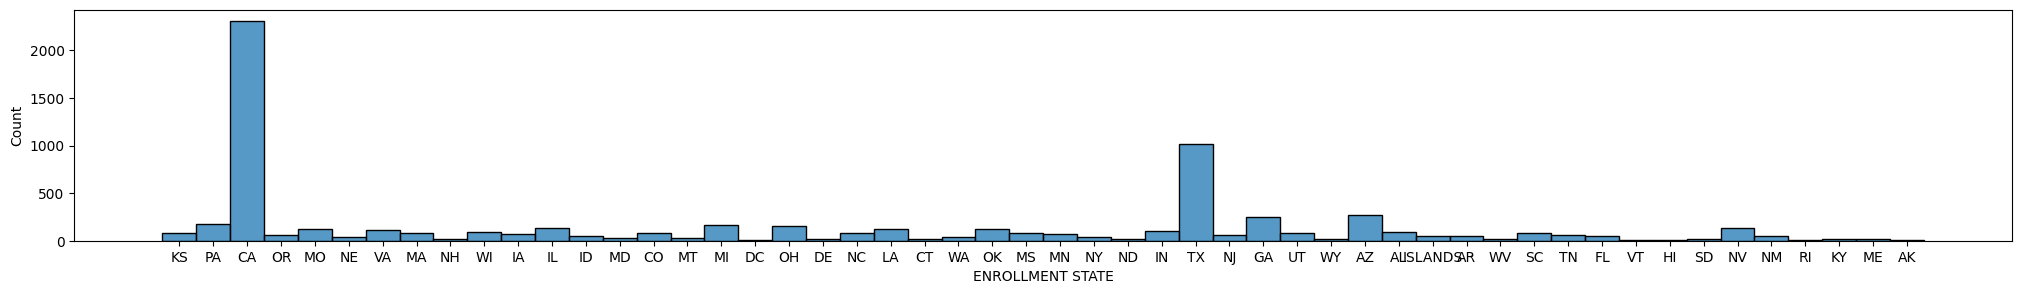

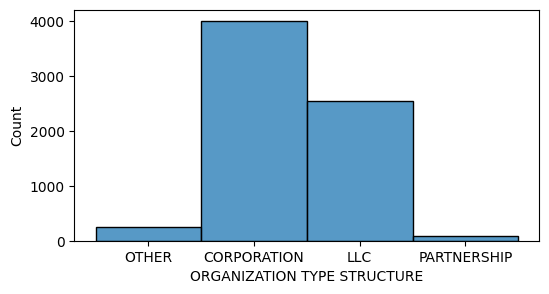

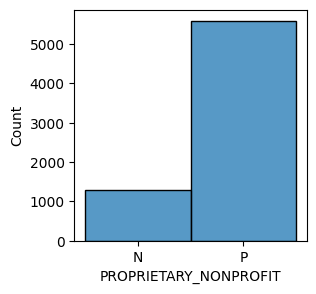

In [11]:
plt.figure(figsize=(25, 3))
sns.histplot(data=df, x='ENROLLMENT STATE')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='ORGANIZATION TYPE STRUCTURE')
plt.show()

plt.figure(figsize=(3, 3))
sns.histplot(data=df, x='PROPRIETARY_NONPROFIT')
plt.show()

California seems to be a pretty massive outlier in terms of enrollment states, and there are an obscenely greater number of corporations and LLC's than any other organization type.

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?


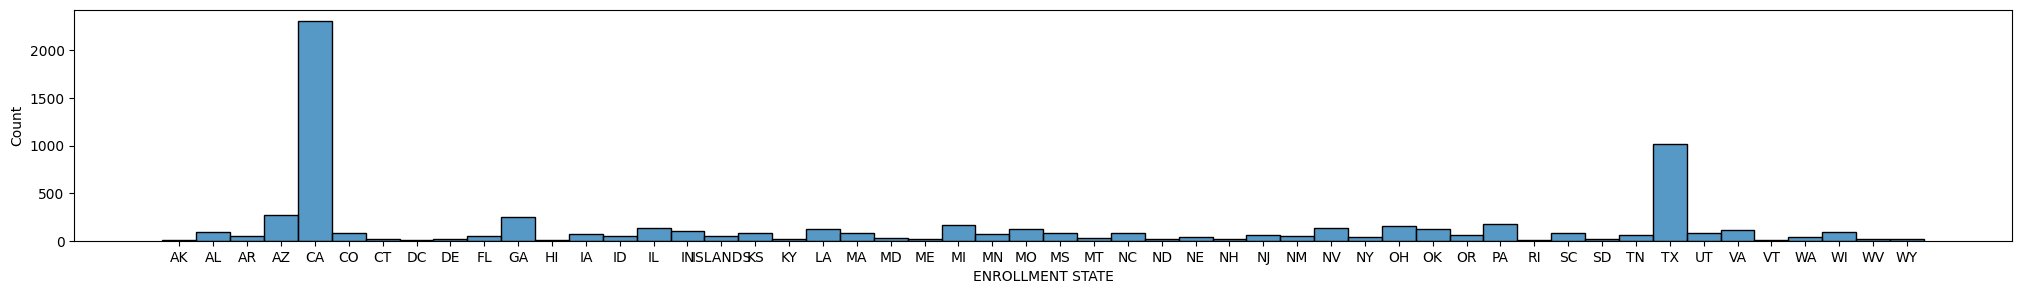

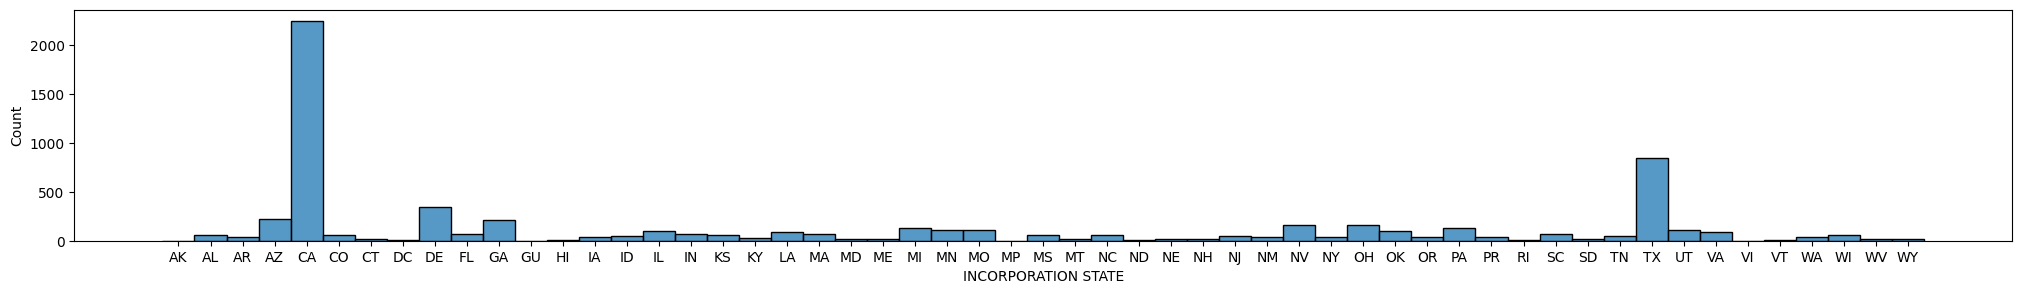

In [12]:
sorted_df = df.sort_values(by='ENROLLMENT STATE')
plt.figure(figsize=(25, 3))
sns.histplot(data=sorted_df, x='ENROLLMENT STATE')
plt.show()

sorted_df = df.sort_values(by='INCORPORATION STATE')
plt.figure(figsize=(25, 3))
sns.histplot(data=sorted_df, x='INCORPORATION STATE')
plt.show()

The histograms of enrollment state and incorporation state are mostly the same, with a few states having slight discrepencies bewteen the two categories, like Deleware, Minnesota, and Utah. The results did not require any transformations.

6. Create a scatter plot, and describe the relationship you see.


With this data set, there aren't really any numeric variables that allow me to create a typical scatter plot to see correlation between two variables. All the columns are comprised of *categorical* data. So, I attempted to create some sort of "scatter" plot using the e National Plan and Provider Enumeration System (NPI) of the different hospices, and their zip codes. The hue of the plot was colored using the IRS Proprietary or Nonprofit registration variable of each hospice. I was hoping to see some sort of correlation between zip code and IRS registration, but it does not appear that certain regions have more or less of a preference for organization type.

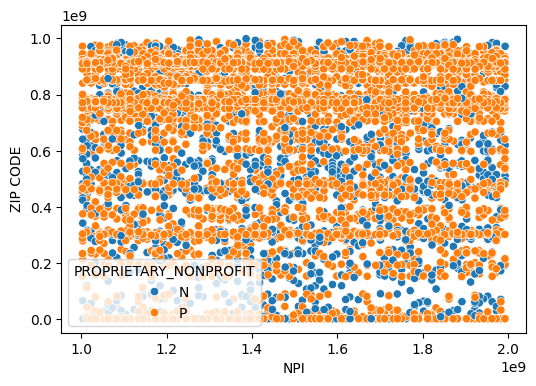

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='NPI',y='ZIP CODE', hue='PROPRIETARY_NONPROFIT')
plt.show()

7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

For this question, I opted to use the date of the hospice becoming incorporated as a variable in the five-number summary. I first converted the string date to a datetime object so I could parse it and use it as an int for the calculations. Seeing this paired with the organization type structure, we can see that older hospices are more frequently categorized as "other", while newer companies make up the majority of LLC's. Between Corporations and LLC's (which are the two most common categories), we see older hopsices more frequently being corporations, and newer hospices being LLC's.

In [22]:
date = pd.to_datetime(df['INCORPORATION DATE'], format='%m/%d/%Y')
df['INCORPORATION DATE'] = date
del date

print(df.loc[:,['ORGANIZATION TYPE STRUCTURE', 'INCORPORATION DATE']].groupby('ORGANIZATION TYPE STRUCTURE').describe(datetime_is_numeric=True))

                            INCORPORATION DATE                                 \
                                         count                           mean   
ORGANIZATION TYPE STRUCTURE                                                     
CORPORATION                               3973  2004-07-11 16:42:31.623458304   
LLC                                       2244  2013-12-13 21:12:30.802139136   
OTHER                                      108            1992-08-12 16:00:00   
PARTNERSHIP                                 59  2008-08-19 20:44:44.745762816   

                                                                       \
                                             min                  25%   
ORGANIZATION TYPE STRUCTURE                                             
CORPORATION                  1859-01-28 00:00:00  1996-05-17 00:00:00   
LLC                          1927-09-22 00:00:00  2009-12-09 00:00:00   
OTHER                        1848-05-29 00:00:00  1982-10-26 12:00: